In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [3]:
df=pd.read_csv('training_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Feature and Target Variables

In [5]:
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])  # Exclude non-numeric features
y = df['Survived']

### Handle Missing Values for Age (example of imputation for missing values)

In [7]:
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Impute missing values in 'Embarked' with the mode

### Feature Selection and Encoding

In [9]:
categorical_features = ['Sex', 'Embarked', 'Pclass']  # Example categorical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

### Preprocessing Pipelines

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Use StandardScaler for feature scaling
        ('cat', OneHotEncoder(), categorical_features)  # OneHotEncoder for categorical features
    ]
)

### Model Pipeline

In [13]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  # Example model
])

### Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fit the Model

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', RandomForestClassifier())])

### Predict

In [19]:
y_pred = pipeline.predict(X_test)

### Evaluation Metrics

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

### ROC Curve and AUC

In [23]:
y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

### Mean Squared Error, Root Mean Squared Error, and R-squared

In [25]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Print Metrics

In [27]:
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Confusion Matrix:
[[133  24]
 [ 34  77]]
Accuracy: 0.7835820895522388
Precision: 0.7623762376237624
Recall: 0.6936936936936937
F1 Score: 0.7264150943396226
ROC AUC Score: 0.8517530269122626
Mean Squared Error: 0.21641791044776118
Root Mean Squared Error: 0.46520738434354325
R-squared: 0.10805072588512077


### Plot ROC Curve

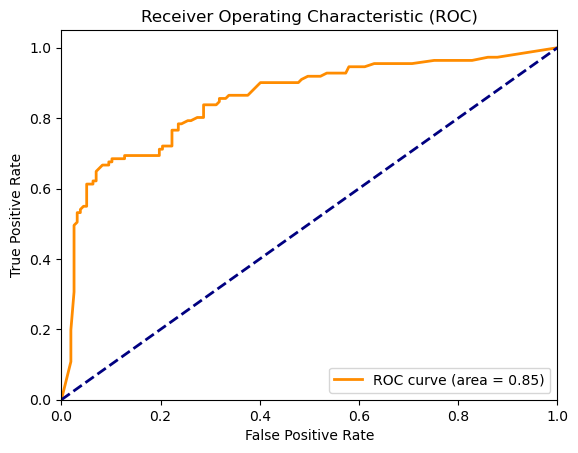

In [29]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Feature Extraction and Encoding

In [31]:
X_transformed = preprocessor.fit_transform(X_train)  # Transform the training data

### Principal Component Analysis

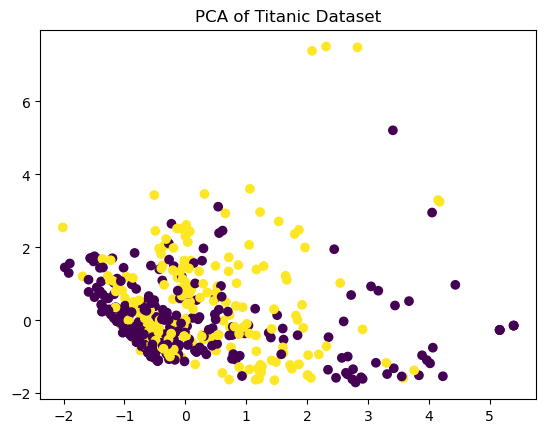

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA of Titanic Dataset')
plt.show()

### Linear Discriminant Analysis

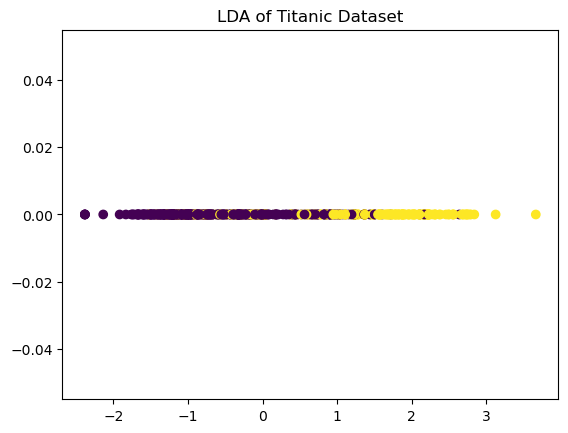

In [35]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_transformed, y_train)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y_train, cmap='viridis')
plt.title('LDA of Titanic Dataset')
plt.show()

### t-SNE

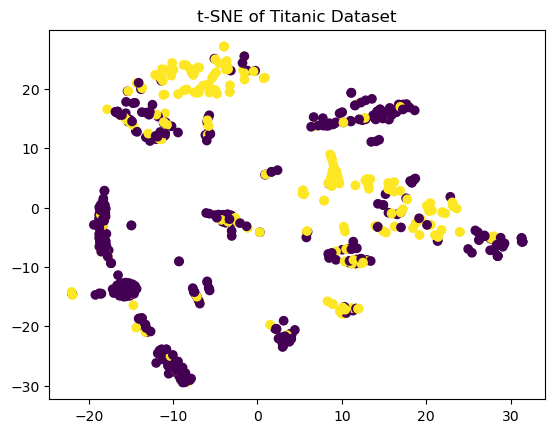

In [37]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_transformed)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE of Titanic Dataset')
plt.show()

### Autoencoders
### Define Autoencoder Model

In [39]:
autoencoder = Sequential()
autoencoder.add(Dense(32, activation='relu', input_shape=(X_transformed.shape[1],)))
autoencoder.add(Dense(16, activation='relu'))
autoencoder.add(Dense(8, activation='relu'))
autoencoder.add(Dense(16, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(X_transformed.shape[1], activation='sigmoid'))

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [41]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

### Train Model

In [43]:
autoencoder.fit(X_transformed, X_transformed, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 500ms/step - loss: 0.5997 - val_loss: 0.4936
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6039 - val_loss: 0.4921
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5995 - val_loss: 0.4905
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5955 - val_loss: 0.4887
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5896 - val_loss: 0.4867
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5872 - val_loss: 0.4845
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5924 - val_loss: 0.4821
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5729 - val_loss: 0.4794
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5814 - val_loss: 0.4764
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5958 - val_loss: 0.4732
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5685 - val_loss: 0.4697
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5623 - val_loss: 0.4659


### Hyperparameter Tuning

In [45]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20, 30],
}

In [46]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters from Grid Search: {grid_search.best_params_}')

Best parameters from Grid Search: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}


### Random Search

In [48]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)
print(f'Best parameters from Random Search: {random_search.best_params_}')

Best parameters from Random Search: {'classifier__n_estimators': 150, 'classifier__max_depth': 10}


### Cross-validation

In [50]:
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average CV score: {np.mean(cv_scores)}')

Cross-validation scores: [0.7877095  0.81460674 0.83707865 0.7752809  0.8258427 ]
Average CV score: 0.8081036971941498
